# Machine Learning

### Essence of ML
<br>

<details open>
    <summary>What is machine learning (ML)?</summary>


As the name implies, we allow the machine (or the computer) to learn. **Learn from whom?** The machine learns from a large amount of data provided by us. **What is the goal of learning?** The machine learns some patterns or rules from the data. And in return, it gives some insights into additional data in the same form. In other words, the machine tries to propose a hypothesis, which describes the behavior of the entire dataset. When adding new cases to the dataset, the machine can predict the behavior of these cases using the hypothesis. **How do we know if the hypothesis is valid?** A quantitative method is needed to assess the performance of the hypothesis. Intuitively, we can quantify the difference between the predicted behavior and the true behavior. This is known as the <span style="color:red">*Cost Function*</span>. **How do we optimize the hypothesis if the performance is poor?** We systematically update the hypothesis to minimize the cost function using a mathematical approach called <span style="color:red">*Gradient Descent*</span>.

__A formal definition of ML__: a computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.

ML includes a wide range of topics, 
<p align="center">
<img width="360", alt="image" src="https://user-images.githubusercontent.com/66216181/110216068-b1d79800-7e72-11eb-8476-f5b26388aba7.png">
</p><br>
</details>
<br>
<details open>
    <summary>Supervised learning vs. Unsupervised learning</summary>

<span style="color:red">*Supervised learning*</span> refers to the task of learning a hypothesis that predicts an output behavior with a given input case, based on example input-output pairs. The machine is supervised by us (or the expected output), and the goal is to minimize the cost function. <span style="color:red">*Unsupervised learning*</span> refers to the process of learning patterns from untagged data. Since there is no guidance from the expected output, the machine has no "supervisor", and there is no cost function to minimize. Unsupurvised models are typically evaluated with convergence tests.
</details>
<br>
<details open>
    <summary>Gradient descent</summary>
    
Imagine that the mathematical expression of our hypothesis f(x) contains a coefficient. Each time we change the value of the coefficient, we get a new hypothesis. For any given hypothesis, there is a corresponding cost value. If we plot the cost as a function of the coefficients, we get a curve. Our goal is to find the value of the coefficients that minimize the cost of the hypothesis. 
<span style="color:red">*Gradient descent*</span> is the mathematical process of finding the optimized coefficient values. Looking at the figure blow: we start at a random position on the hillside, and we want to get to the bottom of the valley. The slope(gradient) tells us the correct direction toward the bottom. In this case, the slope is negative and we have to move to the right; if we start from the opposite side of the mountain, the slope will be positive and we have to move to the left. As we move down the mountain, the magnitude of the slope becomes smaller, and we take smaller steps (if the steps are too large, we will walk passby the valley).
    
<br>
<p align="center">
<img width="400", alt="image" src="https://user-images.githubusercontent.com/66216181/110220826-e016a100-7e8d-11eb-90ee-5c7cda936b19.png">
</p><br>

    
    
</details>
<br>

<details open>
    <summary>Training, validation, and test sets</summary>
    
<span style="color:red">*Training set*</span> refers to the data provided during optimization; while <span style="color:red">*Validation set*</span> refers to new data that the model have not seen during the training, it's often used for hyper-parameter tuning (learning rate, regularization coefficient, etc.). There is often another type of data called <span style="color:red">*Test set*</span>, which is solely used for reporting model performance after the model has been locked.
<br>
    
</details>
<br>
<details open>
    <summary>Overfitting & Underfitting</summary>

Overfitting or underfitting is a term commonly used to describe the performance of a given model on the validation set compared to the training set. When the model performs equally poorly on training set and validation set, the model has a high <span style="color:red">*bias*</span> and it is <span style="color:red">*underfitting.*</span> When the model performs well on the training set, but poorly on the validation set, the model has a high <span style="color:red">*variance*</span> and it is <span style="color:red">*overfitting.*</span>
A more complicated model is needed if in the case of underfitting; while a simpler model or regularization is needed in the case of overfitting.
<br>
<p align="center">
<img width="600", alt="image" src="https://user-images.githubusercontent.com/66216181/110220463-8319eb80-7e8b-11eb-8199-3bf85c54a0e5.png">
</p><br>
</details>


</details>
<br>
<details open>
    <summary>Regularization</summary>
<br>
Regularization generally refers to the process of suppressing overfitting. There are several common ways to implement regularization, namely L0, L1, L2, early stopping, and dropout for neural networks. L1 regularization and L2 regularization are the most commonly used ones.
    
Using the linear regression with L1, L2 regularization as an example. Look at the figure below, the red dot is the global minimum for the cost function represented by the elliptical contours without regularization. The model corresponding to this global minimum is overfitted, so we have to move to an adjacent point where it also satisfies the constraint on the weight represented by the square or circle. 
    
L1 regularization:
    $ |w_{1}| + |w_{2}| < constraint $
    
L2 regularization:
    $ |w_{1}|^2 + |w_{2}|^2 < constraint $
 
Contour lines have a much greater chance of intersecting a square on the axis than a circle. This means L1 regularization tends to completely remove some features (feature selection) by setting w to 0, L2 rarely remove features.
    
<p align="center">
<img width="600", alt="image" src="https://user-images.githubusercontent.com/66216181/110222803-8d8fb180-7e9a-11eb-85bc-b2faa21c9a4d.png">
</p><br>
</details>



# Linear Regression from Scratch

Linear regression is one the simplest ML models, yet it is also a very powerful model for regression tasks. Let's see how to build a linear regression model from scratch.

### 1 Independent variable --> 1 Dependent variable

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Creating training data with noise
X = np.linspace(1,100,1000) + np.random.randn(1000)
y = np.linspace(1,100,1000) * 6 + 3  + 25*np.random.randn(1000)

Text(0, 0.5, 'Target y')

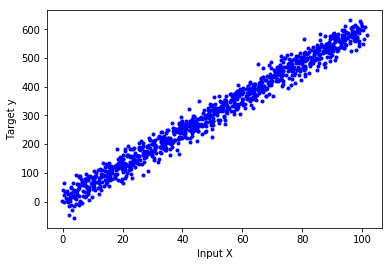

In [3]:
plt.plot(X,y,'b.')
plt.xlabel("Input X")
plt.ylabel('Target y')

<details open>
    <summary>Mathematical derivation</summary>
    
#### Linear Model
 ŷ = w * X + b;
#### Evaluation
RSS	= residual sum of squares

$\sum_{i=1}^n (y_{i} - ŷ_{i})^2$


MSE =  mean squared error

$J(w,b) = \frac{1}{n}\sum_{i=1}^n (y_{i} - ŷ_{i})^2$

#### Gradient descent

updating w:
$ w = w - α\frac{\partial J(w,b)}{\partial w} = \frac{-2}{n}\sum_{i=1}^n (y_{i} - ŷ_{i}) * X$;

updating b:
$ b = b - α\frac{\partial J(w,b)}{\partial b} = \frac{-2}{n}\sum_{i=1}^n (y_{i} - ŷ_{i}) $
    
</details>

In [4]:
# Propose a model ==> (w,b)
np.random.seed(42)
w = np.random.randn(1)
b = np.random.randn(1)

# Get output using the proposed model ==> ŷ 
y_hat = X * w + b 

# Evaluate performance of the initial model ==> MSE
mse = sum((y_hat - y)**2)/len(X)
print('MSE of initial model: {}'.format(mse))

#Gradient descent, update (w,b)
w = w - 0.00005 * (-2/len(X) * sum((y - y_hat) * X))
b = b - 0.002 * (-2/len(X) * sum(y - y_hat))

# Re-evaluation after 1-step gradient descent
y_hat = X * w + b 
mse = sum((y_hat - y)**2)/len(X)
print('MSE of 1-step model: {}'.format(mse))

#How about 20 steps:
loss = [105992.64543369334,69772.88213923965]
for i in range(18):
    w = w - 0.00005 * (-2/len(X) * sum((y - y_hat) * X))#5e-5 is the learning rate for w
    b = b - 0.002 * (-2/len(X) * sum(y - y_hat))#2e-3 is the learning rate for b
    y_hat = X * w + b 
    mse = sum((y_hat - y)**2)/len(X)
    loss.append(mse)
    print('MSE of {}-step model: {}'.format(i+2,mse))
    
print('Final model: w = {}, b = {}'.format(w[0],b[0]))

MSE of initial model: 105320.37198727363
MSE of 1-step model: 46254.72057558888
MSE of 2-step model: 20523.186963247765
MSE of 3-step model: 9313.425003791546
MSE of 4-step model: 4429.969721603055
MSE of 5-step model: 2302.5250119991715
MSE of 6-step model: 1375.7167365904795
MSE of 7-step model: 971.957199719738
MSE of 8-step model: 796.060134635507
MSE of 9-step model: 719.4297409121444
MSE of 10-step model: 686.0441714956168
MSE of 11-step model: 671.4979066293228
MSE of 12-step model: 665.1588549746958
MSE of 13-step model: 662.3952214515762
MSE of 14-step model: 661.1891974250099
MSE of 15-step model: 660.6617388879029
MSE of 16-step model: 660.4298965547194
MSE of 17-step model: 660.3268412816484
MSE of 18-step model: 660.2798951295513
MSE of 19-step model: 660.2573964628607
Final model: w = 6.017417448192188, b = 3.233686587040213


Text(0, 0.5, 'MSE')

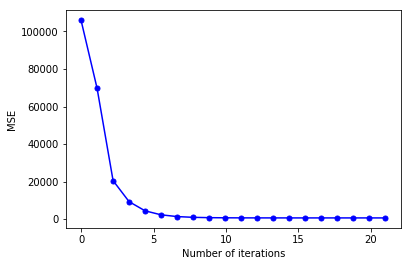

In [5]:
plt.plot(np.linspace(0,21,20),loss,'bo-',markersize=5)
plt.xlabel('Number of iterations')
plt.ylabel('MSE')

The loss drops monotonically after each iteration, and eventually plateaus to the global minimum. The parameters are optimized from the randomly initialized values. Let's see how the final model predicts the data.

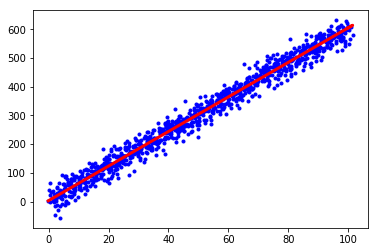

In [6]:
# Final Model:
plt.plot(X,y,'b.')
plt.plot(X,y_hat,'r',linewidth=3)

### n Independent variable --> m Dependent variable

When the sample space is nolonger 1D, the computing becomes much more challenging since we have to write out all the parameter update steps for every single dimension ($ w_{11},w_{12},...,w_{mn} $). Linear algebra offers a much easier way to carry out the computation. Let's seem how to vactorize the process. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [8]:
#Creating random data

X = 100*np.random.randn(2000).reshape(1000,2) + 25*np.random.rand(1000,2)

y1 =  3 * X[:,0].reshape(-1,1) + 5 * X[:,1].reshape(-1,1) +7 + 5 * np.random.rand(1000,1)
y2 = -2 * X[:,0].reshape(-1,1) + X[:,1].reshape(-1,1) +5 + 5 * np.random.rand(1000,1)


Text(0.5, 0.92, '3D-Visualization')

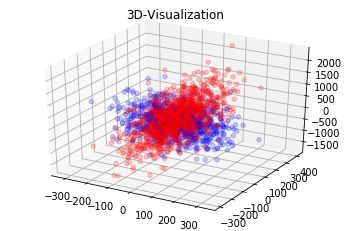

In [9]:
# Visualizing Data in 3D
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.gca(projection='3d')


a = np.linspace(-300, 300, 1000)
b = np.linspace(-300, 300, 1000)

ax.scatter3D(X[:,0].reshape(-1,1), X[:,1].reshape(-1,1), y1, color = "red",alpha=0.2)
ax.scatter3D(X[:,0].reshape(-1,1), X[:,1].reshape(-1,1), y2, color = "blue",alpha=0.2)


ax.set_title('3D-Visualization')


<details open>
    <summary>Mathematical derivation</summary> 
 

    
 $$ ŷ_{11} = w_{11} * X_{11} + w_{12} * X_{12} + b_{11} $$
 
 $$ ŷ_{12} = w_{21} * X_{11} + w_{22} * X_{12} + b_{21} $$
 $$ ....... $$

#### Vectorization
    
$$ Ŷ = X·w^T + b $$

$$
Ŷ = 
\begin{bmatrix}
X_{1,1} & X_{1,2}\\
X_{2,1} & X_{2,2}\\
 ... & ...\\
X_{1000,1} & X_{1000,2}\\
\end{bmatrix}
\begin{bmatrix}
w_{1,1} & w_{2,1} \\
w_{1,2} & w_{2,2} \\
\end{bmatrix}
+
\begin{bmatrix}
b_{1} & b_{2} \\
b_{1} & b_{2} \\
... &... \\
b_{1} & b_{2}
\end{bmatrix}
$$
    
</details>

In [10]:
#Create tensor
X = torch.from_numpy(X)
Y = torch.from_numpy(np.hstack((y1,y2)))

# Propose a model ==> (w,b)
torch.manual_seed(42)
w = torch.randn(2,2,requires_grad=True, dtype = torch.float64)
b = torch.randn(2,requires_grad=True, dtype = torch.float64)

# Get output using the proposed model ==> ŷ 
Y_hat = X @ w.t() + b

# Evaluate performance of the initial model ==> MSE
mse = torch.sum((Y_hat-Y)**2) / Y.numel()
print('MSE of initial model: {}'.format(mse))

#Gradient descent, update (w,b)
mse.backward()

# Re-evaluation after 1-step gradient descent
with torch.no_grad():
    w -= w.grad * 0.00003
    b -= b.grad * 0.00003
    w.grad.zero_()
    b.grad.zero_()
    
Y_hat = X @ w.t() + b
mse = torch.sum((Y_hat-Y)**2) / Y.numel()
print('MSE of 1-step model: {}'.format(mse))

# How about 10 more steps:
loss = [193148.77403374686,90220.90682016108]
for i in range(10):
    mse.backward()
    with torch.no_grad():
        w -= w.grad * 0.00003
        b -= b.grad * 0.00003
        w.grad.zero_()
        b.grad.zero_()
    Y_hat = X @ w.t() + b
    mse = torch.sum((Y_hat-Y)**2) / Y.numel()
    loss.append(mse)
    print('MSE of {}-step model: {}'.format(i+2,mse))



MSE of initial model: 193148.77403374686
MSE of 1-step model: 90220.90682016108
MSE of 2-step model: 42242.51982448351
MSE of 3-step model: 19839.987286519317
MSE of 4-step model: 9360.551662814096
MSE of 5-step model: 4448.997980016644
MSE of 6-step model: 2142.2989524659283
MSE of 7-step model: 1056.6131637700028
MSE of 8-step model: 544.4509851013239
MSE of 9-step model: 302.2653797860315
MSE of 10-step model: 187.45734657239717
MSE of 11-step model: 132.89111191947825


Text(0, 0.5, 'MSE')

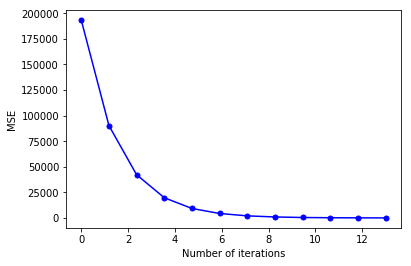

In [11]:
plt.plot(np.linspace(0,13,12),loss,'bo-',markersize=5)
plt.xlabel('Number of iterations')
plt.ylabel('MSE')

In [12]:
print('Final model: w = {}, b = {}'.format(w,b))

Final model: w = tensor([[ 2.9668,  4.9551],
        [-1.9333,  0.9958]], dtype=torch.float64, requires_grad=True), b = tensor([-1.1076, -0.1861], dtype=torch.float64, requires_grad=True)


Text(0.5, 0.92, '3D-Visualization')

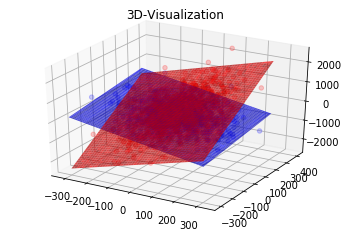

In [13]:
# Visualizing Data in 3D
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.gca(projection='3d')


a = np.linspace(-300, 300, 1000)
b = np.linspace(-300, 300, 1000)

A, B = np.meshgrid(a, b)
C = 2.9668 * A + 4.9551 * B - 1.1076
D = -1.9333 * A + 0.9958 * B - 0.1861

ax.plot_surface(A, B, C, alpha=0.7,color = "red")
ax.plot_surface(A, B, D, alpha=0.7,color = "blue")
ax.scatter3D(X[:,0].reshape(-1,1), X[:,1].reshape(-1,1), y1, color = "red",alpha=0.2)
ax.scatter3D(X[:,0].reshape(-1,1), X[:,1].reshape(-1,1), y2, color = "blue",alpha=0.2)


ax.set_title('3D-Visualization')



# Logistic Regression from Scratch

Logistic regression in the simplest classification model, and it is often considered as the building block of neural networks.